# The Machine Learning Process:
- Understanding Business Problem
- Data Collection
- Data Preparation
- Feature Engineering
- Model Selection
- Model Training
- Model Evaluation

# Import Library

In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
turnover = pd.read_csv('turnover.csv')

In [3]:
attributes = pd.read_csv('attributes.csv')

# Assign Column Names

In [4]:
turnover.columns

Index(['7.030800821', '1', 'm', '35', 'Banks', 'HR', 'rabrecNErab', 'no', 'f',
       'white', 'bus', '6.2', '4.1', '5.7', '7.1', '8.3'],
      dtype='object')

In [5]:
attributes

,column_name,desc
0,stag,Experience (month)
1,event,Employee turnover
2,gender,"Employee's gender, female(f), or male(m)"
3,age,Employee's age (year)
4,industry,Employee's Industry
5,profession,Employee's profession
6,traffic,From what pipelene employee came to the compan...
7,coach,Presence of a coach (training) on probation
8,head_gender,head (supervisor) gender
9,greywage,The salary does not seem to the tax authoritie...


In [6]:
turnover.columns = attributes.column_name.values

In [7]:
turnover.columns

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

# Data Preparation

## Missing Value Detection

Mengecek jumlah nan/null value di setiap kolom dengan isna()/isnull() dan sum()

In [8]:
turnover.isna().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [9]:
turnover.isnull().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

## Duplicate Data Detection

Cek semua data duplikat

In [10]:
turnover[turnover.duplicated(keep = False)]

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
4,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
5,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
35,22.735113,1,f,34.0,Retail,HR,KA,no,m,white,car,5.4,5.5,4.9,4.8,4.4
36,22.735113,1,f,34.0,Retail,HR,KA,no,m,white,car,6.2,6.2,4.9,3.3,2.9
37,22.735113,1,f,34.0,Retail,HR,KA,no,m,white,car,5.4,5.5,4.9,4.8,4.4
38,22.735113,1,f,34.0,Retail,HR,KA,no,m,white,car,6.2,6.2,4.9,3.3,2.9
59,15.572895,1,f,24.0,Retail,HR,youjs,no,f,white,foot,6.2,7.6,3.3,3.3,6.7
60,15.572895,1,f,24.0,Retail,HR,youjs,no,f,white,foot,6.2,7.6,3.3,3.3,6.7
142,78.685832,1,f,31.0,Banks,HR,rabrecNErab,no,f,grey,bus,3.8,4.1,7.2,8.7,2.1
143,78.685832,1,f,31.0,Banks,HR,rabrecNErab,no,f,grey,bus,3.8,4.1,7.2,8.7,2.1


Drop data duplikat. Dari data duplikat tersebut, simpan yang terakhir

In [11]:
turnover = turnover.drop_duplicates(keep = 'last')

Reset index untuk mengembalikan urutan index

In [12]:
turnover = turnover.reset_index(drop = True)

In [13]:
turnover.drop_duplicates()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
1,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
3,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
4,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,6.669405,0,f,27.0,Banks,HR,youjs,no,f,white,bus,9.4,5.5,3.3,4.0,7.5
1111,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1112,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1113,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


## Data Understanding

### Data Info

In [14]:
# Cek ukuran data
turnover.shape

(1115, 16)

In [15]:
# Cek dataframe info: Columns, Non-null Count, Dtypes, Memory Usage
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1115 non-null   float64
 1   event         1115 non-null   int64  
 2   gender        1115 non-null   object 
 3   age           1115 non-null   float64
 4   industry      1115 non-null   object 
 5   profession    1115 non-null   object 
 6   traffic       1115 non-null   object 
 7   coach         1115 non-null   object 
 8   head_gender   1115 non-null   object 
 9   greywage      1115 non-null   object 
 10  way           1115 non-null   object 
 11  extraversion  1115 non-null   float64
 12  independ      1115 non-null   float64
 13  selfcontrol   1115 non-null   float64
 14  anxiety       1115 non-null   float64
 15  novator       1115 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 139.5+ KB


### Statistical Summary

In [16]:
turnover.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,36.728413,0.501345,31.021169,5.589058,5.475695,5.607444,5.665381,5.875157
std,34.176812,0.500223,6.975189,1.858144,1.702414,1.986609,1.711264,1.903003
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.476386,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.663244,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Feature Understanding

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

__Cek Jumlah Pekerja berdasarkan Gender__

<AxesSubplot:title={'center':'Jumlah Pegawai berdasarkan Gender'}, xlabel='gender'>

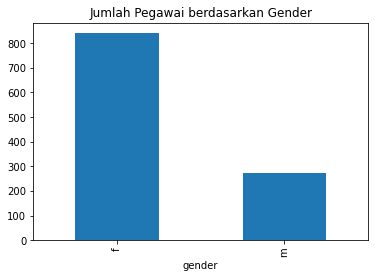

In [18]:
turnover.gender.value_counts().plot(kind = 'bar', title = 'Jumlah Pegawai berdasarkan Gender')

__Cek Distribusi Pekerja berdasarkan Industri__

Text(0.5, 1.0, 'Cek Outliers berdasarkan Posisi Pekerja')

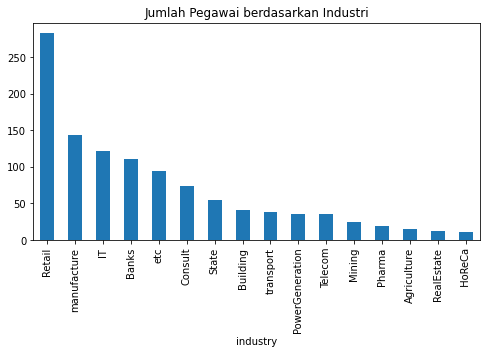

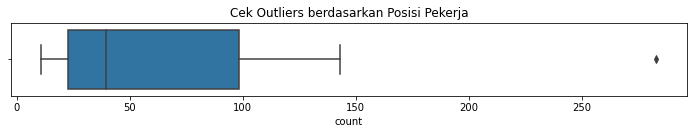

In [19]:
turnover.industry.value_counts().plot(kind = 'bar', title = 'Jumlah Pegawai berdasarkan Industri', figsize = (8, 4))

plt.figure(figsize = (10, 2))
sns.boxplot(x = turnover.industry.value_counts())
plt.tight_layout(pad = 2.0)
plt.title('Cek Outliers berdasarkan Posisi Pekerja')

__Cek Distribusi Pekerja berdasarkan Posisi__

Text(0.5, 1.0, 'Cek Outliers berdasarkan Posisi Pekerja')

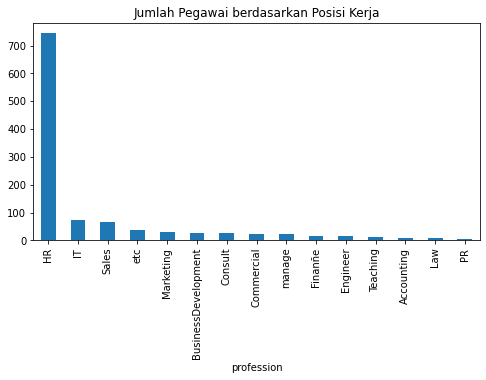

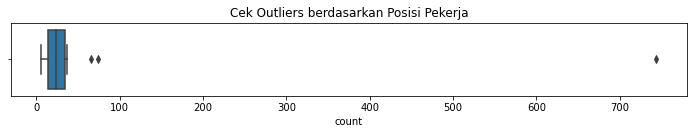

In [20]:
turnover.profession.value_counts().plot(kind = 'bar', title = 'Jumlah Pegawai berdasarkan Posisi Kerja', figsize = (8, 4))

plt.figure(figsize = (10, 2))
sns.boxplot(x = turnover.profession.value_counts())
plt.tight_layout(pad = 2.0)
plt.title('Cek Outliers berdasarkan Posisi Pekerja')

__Cek Distribusi Data Numerik__

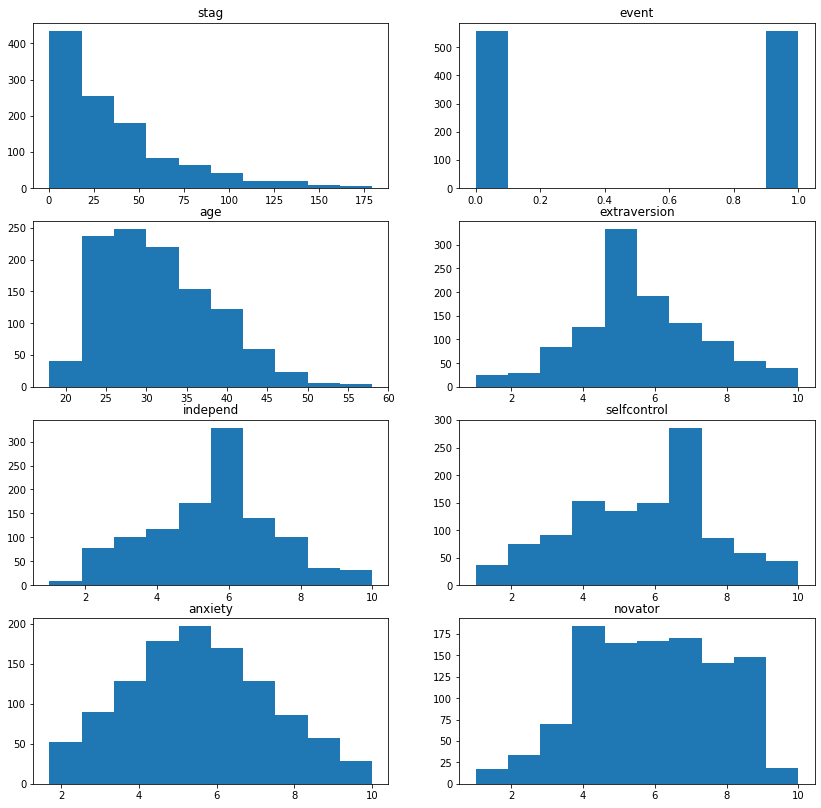

In [21]:
# turnover.plot(kind = 'hist', subplots = True, sharex = False, figsize = (5,20))

fig, axs = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize = (14, 14))
for i, col in enumerate(turnover.select_dtypes(exclude = 'object').columns):
    axs[i//2,i%2].hist(turnover[col])
    axs[i//2,i%2].set_title(col)
plt.show()

__Cek Distribusi Usia Pekerja__

Text(0.5, 1.0, 'Cek Outliers berdasarkan Distribusi Usia Pekerja')

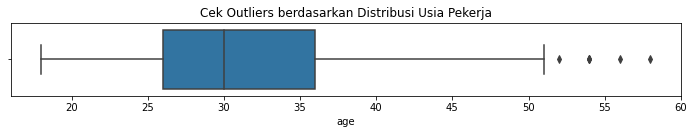

In [22]:
# turnover.age.plot(kind = 'hist', title = 'Distribusi Usia Pekerja', figsize = (10, 4))

plt.figure(figsize = (10, 2))
sns.boxplot(x = turnover.age)
plt.tight_layout(pad = 2.0)
plt.title('Cek Outliers berdasarkan Distribusi Usia Pekerja')

__Cek Distribusi Pengalaman Lama Bekerja__

Text(0.5, 1.0, 'Cek Outliers berdasarkan Distribusi Lama Bekerja')

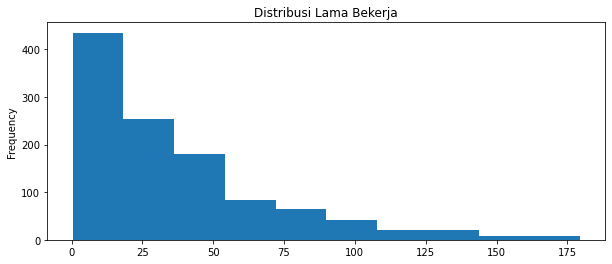

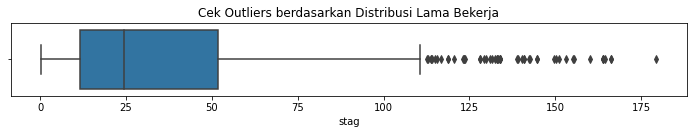

In [23]:
turnover['stag'].plot(kind = 'hist', title = 'Distribusi Lama Bekerja', figsize = (10, 4), bins = 10)

plt.figure(figsize = (10, 2))
sns.boxplot(x = turnover.stag)
plt.tight_layout(pad = 2.0)
plt.title('Cek Outliers berdasarkan Distribusi Lama Bekerja')

### Handling Outliers

In [25]:
z_score_stag = np.abs((turnover.stag - turnover.stag.mean()) / turnover.stag.std())
z_score_age = np.abs((turnover.age - turnover.age.mean()) / turnover.age.std())

turnover = turnover[(z_score_stag <=  1.75) & (z_score_age <=  3)].reset_index(drop = True)

__Cek Distribusi Data setelah Mengeliminasi Outliers__

Text(0.5, 1.0, 'Cek Outliers berdasarkan Distribusi Lama Bekerja')

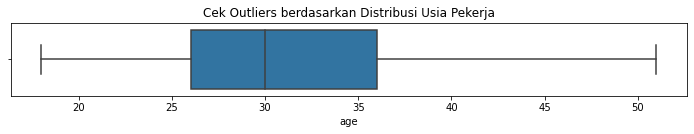

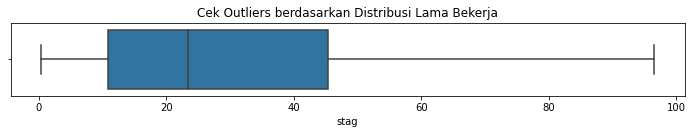

In [26]:
# Distribusi Usia Pekerja
plt.figure(figsize = (10, 2))
sns.boxplot(x = turnover.age)
plt.tight_layout(pad = 2.0)
plt.title('Cek Outliers berdasarkan Distribusi Usia Pekerja')

# Distribusi Pengalaman Lama Bekerja
plt.figure(figsize = (10, 2))
sns.boxplot(x = turnover.stag)
plt.tight_layout(pad = 2.0)
plt.title('Cek Outliers berdasarkan Distribusi Lama Bekerja')

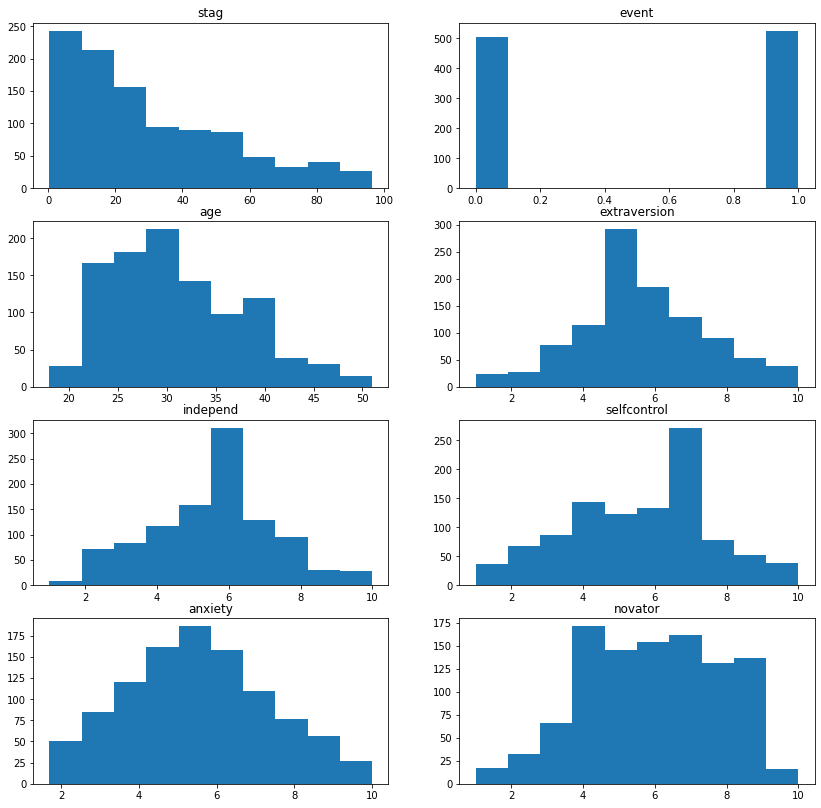

In [27]:
# Distribusi Data Numerik
fig, axs = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize = (14, 14))
for i, col in enumerate(turnover.select_dtypes(exclude = 'object').columns):
    axs[i//2,i%2].hist(turnover[col])
    axs[i//2,i%2].set_title(col)
plt.show()

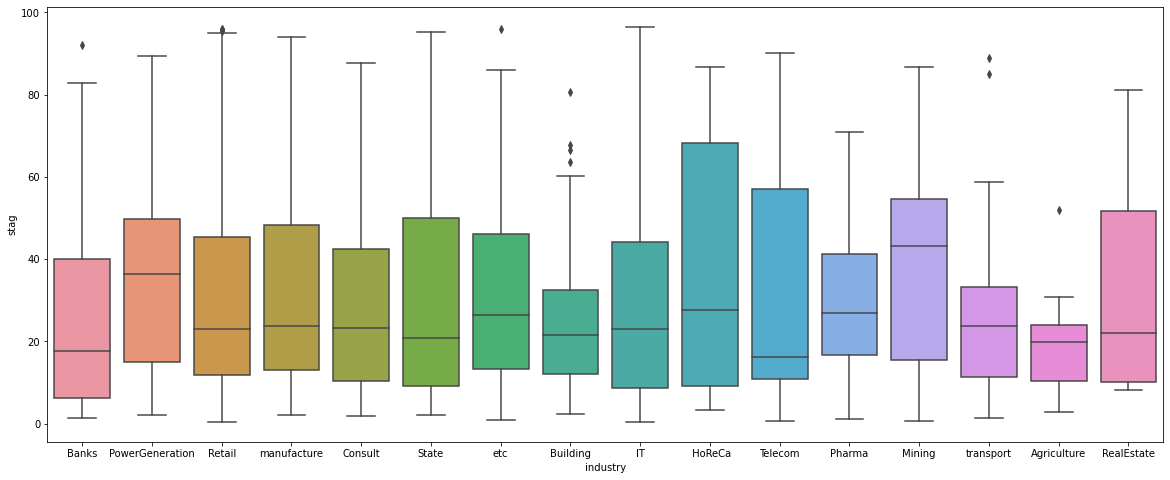

In [28]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = turnover, x = 'industry', y = 'stag')
plt.show()

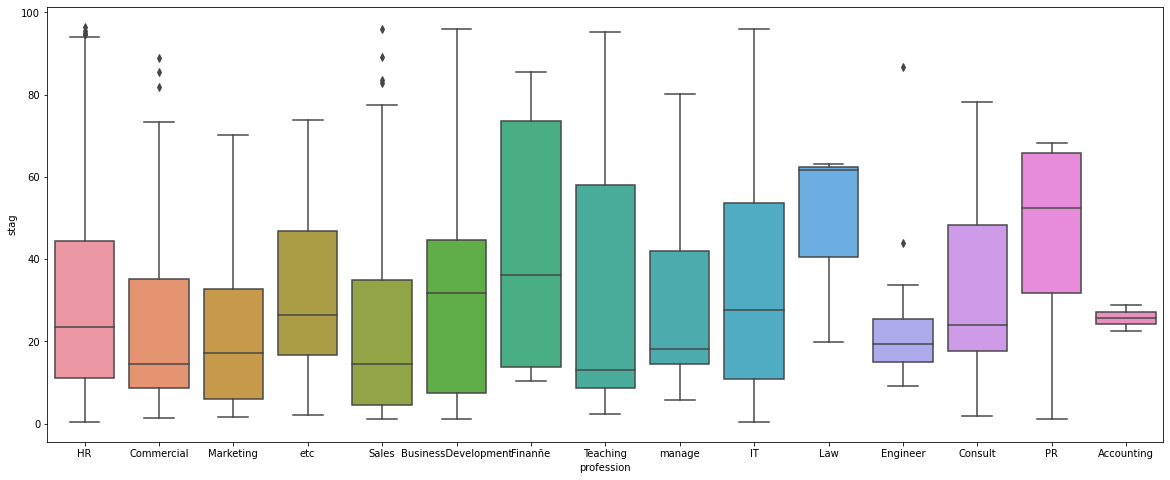

In [29]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = turnover, x = 'profession', y = 'stag')
plt.show()

### Pivot Table

In [ ]:
from pivottablejs import pivot_ui

In [ ]:
pivot_ui(turnover)

# Feature Engineering

## Data Transformation

Declare dataframe baru sebagai copy dari dataframe turnover

In [66]:
turnover_model = turnover.copy()

In [67]:
feature = turnover_model.drop('event',axis = 1)

Pisahkan data numerikal dan non numerik pada feature

In [68]:
numeric = feature.select_dtypes(exclude = 'object').columns
non_numeric = feature.select_dtypes('object').columns

### Encoding data kategorikal

In [69]:
# Import library
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [70]:
# Proses encoding data kategorikal
for column in non_numeric:
    turnover_model[column] = label.fit_transform(turnover[column])

In [71]:
turnover_model.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,22.965092,1,1,33.0,2,6,2,1,1,1,0,6.2,4.1,5.7,7.1,8.3
1,15.934292,1,0,35.0,8,6,4,1,1,1,0,6.2,6.2,2.6,4.8,8.3
2,15.934292,1,0,35.0,8,6,4,1,1,1,0,5.4,7.6,4.9,2.5,6.7
3,8.410678,1,1,32.0,10,2,7,2,0,1,0,3.0,4.1,8.0,7.1,3.7
4,8.969199,1,0,42.0,14,6,2,2,1,1,0,6.2,6.2,4.1,5.6,6.7


### Scaling data numerikal

In [72]:
# Import library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
# Proses standardize data kategorikal
turnover_model[numeric] = scaler.fit_transform(turnover_model[numeric])

In [74]:
turnover_model.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,-0.294704,1,1,0.278033,2,6,2,1,1,1,0,0.307774,-0.820448,0.054881,0.840734,1.271635
1,-0.588215,1,0,0.573812,8,6,4,1,1,1,0,0.307774,0.431318,-1.506942,-0.494453,1.271635
2,-0.588215,1,0,0.573812,8,6,4,1,1,1,0,-0.119604,1.265828,-0.348170,-1.829639,0.435046
3,-0.902300,1,1,0.130143,10,2,7,2,0,1,0,-1.401737,-0.820448,1.213654,0.840734,-1.133557
4,-0.878983,1,0,1.609042,14,6,2,2,1,1,0,0.307774,0.431318,-0.751221,-0.030040,0.435046


# Modelling

__Cek Korelasi Data__

<AxesSubplot:>

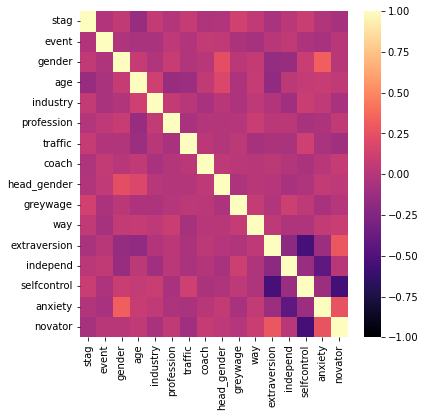

In [75]:
plt.figure(figsize = (6, 6))
sns.heatmap(turnover_model.corr(), vmax = 1, vmin = -1, center = 0, cmap = 'magma')

## Declare features (X) & target (y)

In [76]:
X = turnover_model.drop('event',axis = 1)
y = turnover.event

## Train-Test Split

In [77]:
# Define data yang akan ditugaskan untuk membuat model dan menguji model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model Training

### Import library

In [78]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    classification_report
)

### __Fitting & Evaluating Models__

In [43]:
# Fitting dan evaluating beberapa model sekaligus

model_names = [
    'RandomForestClassifier', 'ExtraTreesClassifier', 'DecisionTreeClassifier',
    'LogisticRegression', 'KNeighborsClassifier'
]

model_list = [
    RandomForestClassifier, ExtraTreesClassifier, DecisionTreeClassifier,
    LogisticRegression, KNeighborsClassifier
]

# declare dataframe untuk melihat perbandingan akhir
model_compare = pd.DataFrame(
    columns = ['accuracy', 'precision', 'recall', 'f1-score'], 
    index = model_names
)

pengulangan = 7 # banyak pengulangan proses fitting
index = 0
accuracy, precision, recall, f1 = [], [], [], [] # declare variabel akurasi, presisi, recall, dan f1_score

for classifier in model_list:
    model = classifier()
    i = 0
    while i <= pengulangan:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1_ = f1_score(y_test, y_pred)

        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1.append(f1_)
        i += 1

    model_compare.loc[model_names[index]] = [
        round(np.mean(accuracy), 3),
        round(np.mean(precision), 2),
        round(np.mean(recall), 2),
        round(np.mean(f1), 3)
    ]

    index += 1

model_compare.sort_values('f1-score', ascending=False)

,accuracy,precision,recall,f1-score
ExtraTreesClassifier,0.666,0.7,0.68,0.692
RandomForestClassifier,0.664,0.7,0.67,0.688
DecisionTreeClassifier,0.645,0.69,0.65,0.668
LogisticRegression,0.619,0.67,0.61,0.636
KNeighborsClassifier,0.617,0.67,0.6,0.632


### __Model 1: Extra Trees Classifier__

In [79]:
model1 = ExtraTreesClassifier()

#### Fitting Model 1

In [80]:
model1.fit(X_train, y_train)

ExtraTreesClassifier()

#### Evaluating Model 1

In [81]:
y_pred1 = model1.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.67      0.66       116
           1       0.72      0.69      0.71       142

    accuracy                           0.68       258
   macro avg       0.68      0.68      0.68       258
weighted avg       0.68      0.68      0.68       258



<AxesSubplot:>

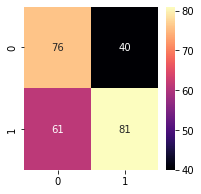

In [83]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (3, 3))
sns.heatmap(confusion, annot = True, cmap = 'magma',)

### __Model 2: Random Forest Classifier__

In [85]:
model2 = RandomForestClassifier()

#### Fitting Model 2

In [86]:
model2.fit(X_train, y_train)

RandomForestClassifier()

#### Evaluating Model 2

In [87]:
y_pred2 = model2.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       116
           1       0.70      0.69      0.69       142

    accuracy                           0.66       258
   macro avg       0.66      0.66      0.66       258
weighted avg       0.66      0.66      0.66       258



<AxesSubplot:>

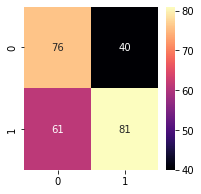

In [89]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (3, 3))
sns.heatmap(confusion, annot = True, cmap = 'magma',)

### __Model 3: Decision Tree Classifier__

In [90]:
model3 = DecisionTreeClassifier()

#### Fitting Model 2

In [91]:
model3.fit(X_train, y_train)

DecisionTreeClassifier()

#### Evaluating Model 2

In [92]:
y_pred3 = model2.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63       116
           1       0.70      0.69      0.69       142

    accuracy                           0.66       258
   macro avg       0.66      0.66      0.66       258
weighted avg       0.66      0.66      0.66       258



<AxesSubplot:>

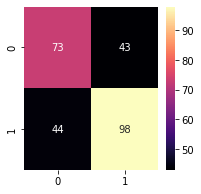

In [94]:
confusion = confusion_matrix(y_test, y_pred2)

plt.figure(figsize = (3, 3))
sns.heatmap(confusion, annot = True, cmap = 'magma',)

### Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score
# evaluate model with cross-validation
scores_train = cross_val_score(model1, X_train, y_train, cv = 5, scoring = 'accuracy')
scores_test = cross_val_score(model1, X_test, y_test, cv = 5, scoring = 'accuracy')

print(f'score_train: {round(np.mean(scores_train), 2)}\nscore_test: {round(np.mean(scores_test), 2)}')

score_train: 0.65
score_test: 0.55


### Kurva Accuracy

In [96]:
train_scores, test_scores = [], []
for i in range(1, 21):
    model1.fit(X_train, y_train)
    
    # Make predictions on training and testing sets
    y_train_pred = model1.predict(X_train)
    y_test_pred = model1.predict(X_test)

    # Calculate accuracy for training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

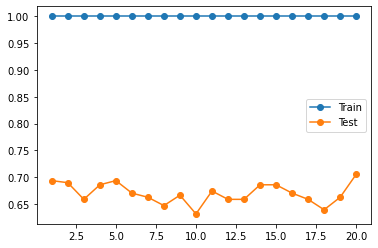

In [97]:
plt.plot(range(1, 21), train_scores, '-o', label = 'Train')
plt.plot(range(1, 21), test_scores, '-o', label = 'Test')
plt.legend()
plt.show()

# Dumping Model

__Dengan joblib__

In [62]:
from joblib import dump

# Dumping model ke dalam file
dump(model1, 'model1.joblib')

['model1.joblib']

__Dengan pickle__

In [63]:
import pickle

# Dumping model ke dalam file
with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)

# Loading Model

__Dengan joblib__

In [64]:
from joblib import load

# Memuat model dari file
model = load('model1.joblib')

__Dengan pickle__

In [65]:
import pickle

# Memuat model dari file
with open('model1.pkl', 'rb') as file:
    model = pickle.load(file)

__Melakukan prediksi dengan model yang sudah diload__

In [ ]:
model.predict([input_data])